## Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

In [3]:
df[:2]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,month_year
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1,2011-01


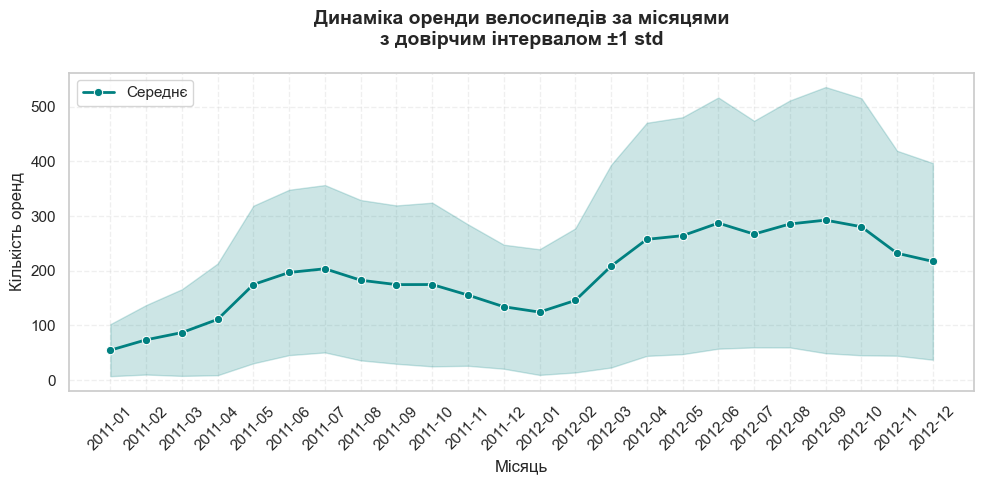

In [4]:
plt.figure(figsize=(10,5))

sns.lineplot(data=df, 
             x='month_year', 
             y='count', 
             errorbar='sd', 
             marker='o', 
             color='teal', 
             label='Середнє', 
             linewidth=2)         # sns.lineplot() автоматично агрегує дані через середнє значення (mean)
plt.title('Динаміка оренди велосипедів за місяцями\nз довірчим інтервалом ±1 std', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Кількість оренд', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show();

**Відповідь на питання:**
- Найбільша невизначеність в даних спостерігається з 2012-03 по 2012-12, в ці місяці найширші довірчі інтервали (близько 200 і навіть більше).
- Це означає, що в ці місяці оренди варіювались дуже сильно - були як дні з високим попитом, так і з низьким.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

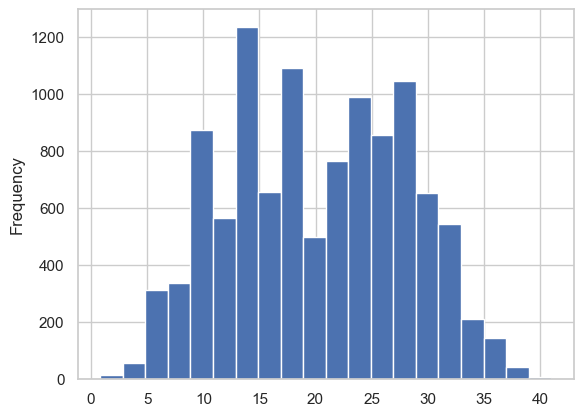

In [5]:
# Гістограма з Pandas без налаштувань
df['temp'].plot.hist(
    bins=20
    # title='Розподіл температури',
    # xlabel='Температура',
    # ylabel='Частота'
);

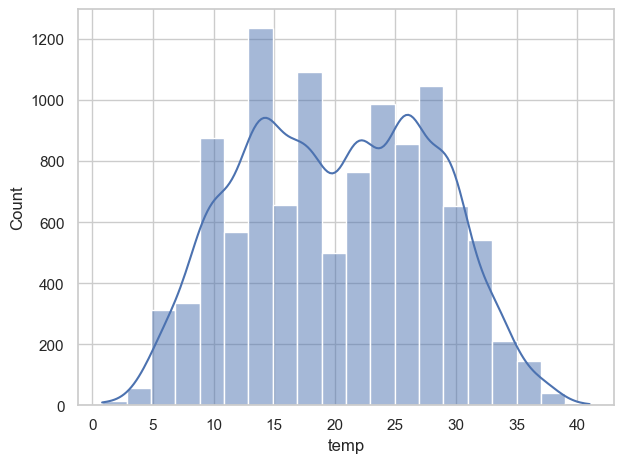

In [6]:
# Гістограма з Seaborn без налаштувань
sns.histplot(
    df['temp'], 
    bins=20, 
    kde=True)
# plt.title('Розподіл температури')
# plt.xlabel('Температура')
# plt.ylabel('Частота')
plt.tight_layout();

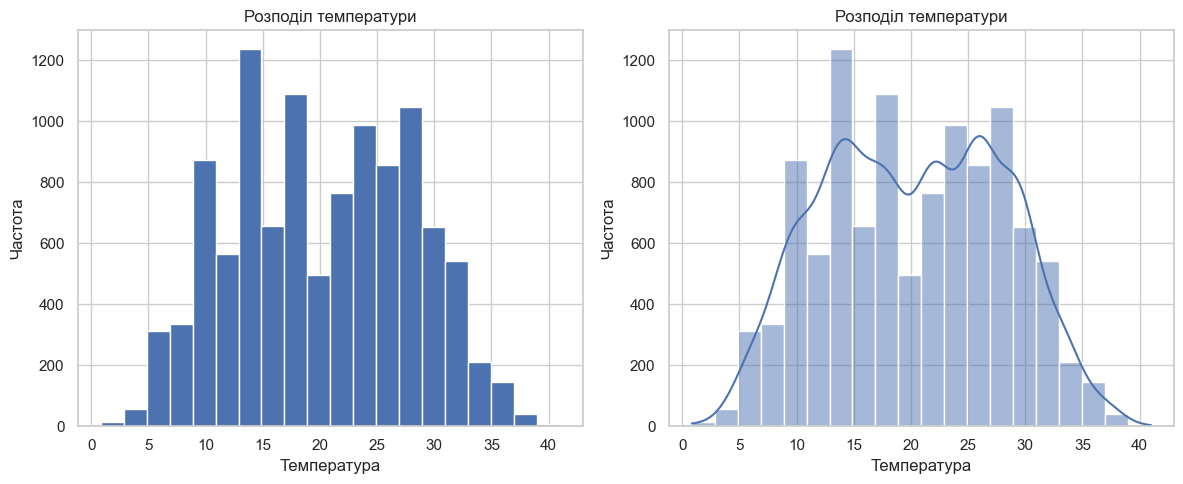

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Гістограма з Pandas
df['temp'].plot.hist(
    ax=ax[0],
    bins=20,
    title='Розподіл температури',
    xlabel='Температура',
    ylabel='Частота'
)

# Гістограма з Seaborn
sns.histplot(df['temp'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Розподіл температури')
ax[1].set_xlabel('Температура')
ax[1].set_ylabel('Частота')

plt.tight_layout()
plt.show();

**Відповіді на питання:**
1. При побудові гістограм в Pandas та Seaborn без додаткових налаштувань є такі відмінності:
    - графік з Seaborn підписує автоматично дві осі;
    - назва по осі Oy відрізняється: в Pandas - Frequency, в Seaborn - Count;
    - з Seaborn біни автоматично напівпрозорі, а сама фігура трошки більшого розміру;
    - з Seaborn важко перейменувати назви осей та задати назву графіка без `fig, ax` (ну в мене не вийшло інакше).
2. Параметр `kde=True` у `sns.histplot()` додає лінію щільності розподілу (Kernel Density Estimate). Це згладжена альтернатива гістограмі. Вона оцінює ймовірність появи значеннь в кожній точці. Ця крива дозволяє побачити форму розподілу (чи симетричний він, чи є хвіст даних, скільки має піків).

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [7]:
weather_labels = ['ясно', 'туман', 'легкий дощ', 'сильний дощ']
ticks = list(range(len(weather_labels)))
ticks

[0, 1, 2, 3]

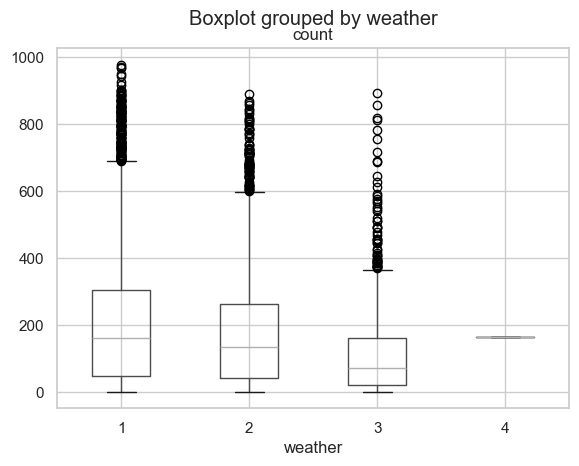

In [28]:
# Box plot з Pandas без налаштувань
df.boxplot(
    column='count',
    by='weather'
    # figsize=(10,6),
    # grid=False
);
# plt.title('Розподіл кількості оренд велосипедів за погодними умовами')
# plt.suptitle('')
# plt.xlabel('Погода')
# plt.ylabel('Кількість оренд')
# plt.xticks(ticks=[1,2,3,4], labels=['ясно', 'туман', 'легкий дощ', 'сильний дощ'])
# plt.tight_layout()

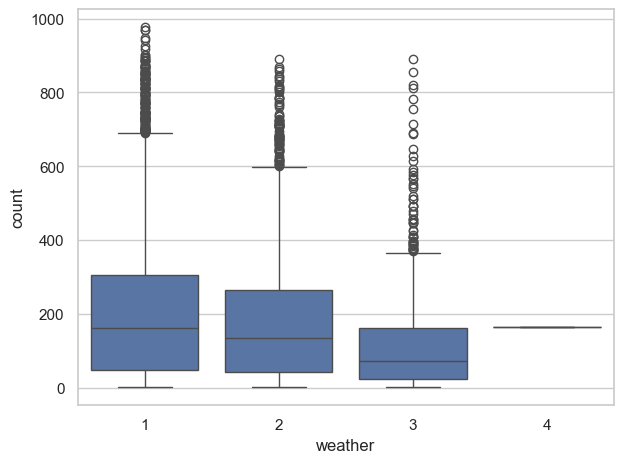

In [25]:
# Box plot з Seaborn без налаштувань
sns.boxplot(
    data=df, 
    x='weather', 
    y='count');
# plt.title('Розподіл кількості оренд велосипедів за погодними умовами')
# plt.xlabel('Погода')
# plt.ylabel('Кількість оренд')
# plt.xticks(ticks=ticks, labels=weather_labels)
plt.tight_layout()

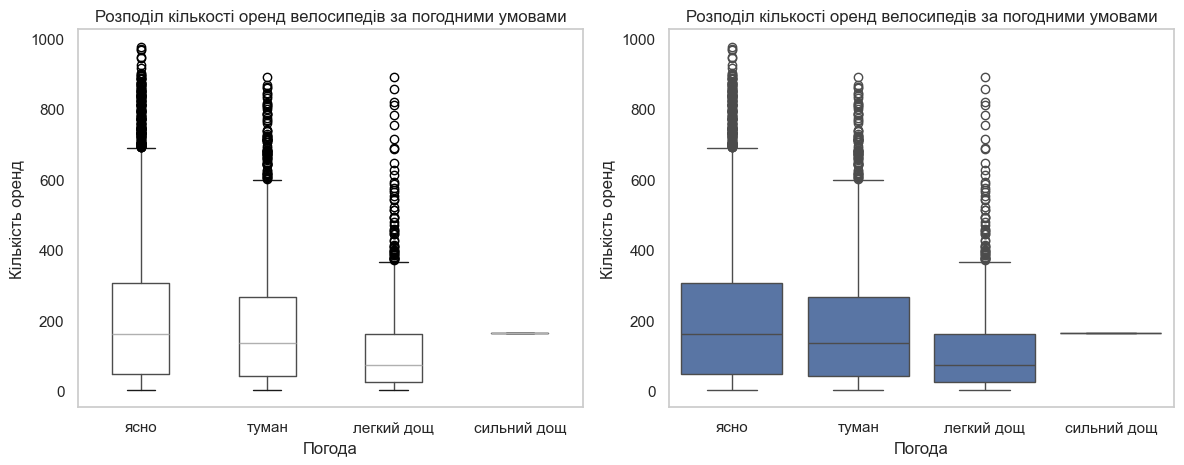

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Box plot з Pandas
df.boxplot(
    ax=ax[0],
    column='count',
    by='weather',
    grid=False,
    xlabel='Погода',
    ylabel='Кількість оренд'
)

ax[0].set_title('Розподіл кількості оренд велосипедів за погодними умовами')
ax[0].set_xticks([1, 2, 3, 4])  # або range(1, 5)
ax[0].set_xticklabels(['ясно', 'туман', 'легкий дощ', 'сильний дощ'])

# Box plot з Seaborn
sns.boxplot(data=df, x='weather', y='count', ax=ax[1])

ax[1].set_title('Розподіл кількості оренд велосипедів за погодними умовами')
ax[1].set_xlabel('Погода')
ax[1].set_ylabel('Кількість оренд')
ax[1].set_xticks(ticks=ticks, labels=weather_labels)
ax[1].grid(False)

plt.suptitle('')
plt.tight_layout()
plt.show();

**Відповідь на питання:**  

При побудові box plot в Pandas та Seaborn без додаткових налаштувань є такі відмінності:  
- графік з Seaborn підписує автоматично дві осі;
- в Pandas створюється автоматичний заголовок `suptitle`;
- з Seaborn лінія медіани більш чітка, бокси автоматично залиті кольром, і самі бокси більшого розміру, в порівнянні з Pandas;
- з Seaborn при перейменувані міток на осі Ox потрібно врахувати, що категорії відображається, як індекси, починаючи з нуля. А в Pandas фігура автоматично створюється за групами категорій.

В цілому з Seaborn графік симпатичніший.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [59]:
correlation = df[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()
correlation

,count,temp,atemp,humidity,windspeed
count,1.000000,0.394454,0.389784,-0.317371,0.101369
temp,0.394454,1.000000,0.984948,-0.064949,-0.017852
atemp,0.389784,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.317371,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.101369,-0.017852,-0.057473,-0.318607,1.000000


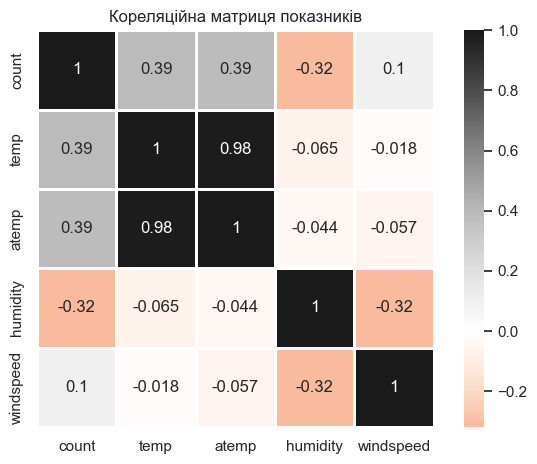

In [83]:
plt.figure()

sns.heatmap(correlation, annot=True, cmap='RdGy', center=0, square=True, linewidths=1)

plt.title('Кореляційна матриця показників')
plt.tight_layout();

**Відповіді на питання**
1. Темперутура повітря в градусах цельсія (`temp`) та те, як вона відчувається (`atemp`) найсильніше корелюють з загальною кількістю оренди (`count`). Кореляція =0.39.
2. Кореляція між `temp` та `atemp` приймає значення 0.98. Це дуже логічно, оскільки те, як ми відчуваємо температуру безпосередньо залежить від самої температури. Вони рухаються практично одночасно: коли підвищується temp, підвищується і atemp. Також на сприйняття температури трохи впливає вологість та вітер. До прикладу: якщо температура 30°C, але вологість дуже висока - нам буде «дуже жарко», і навпаки, при низькій температурі з сильним вітром буде "ще холодніше".
3. Негативну кореляцію мають:
   - загальна кількість оренди (`count`) - `humidity`. Оскільки висока вологість створює неприємні умови для поїздок, зі зростанням вологості кількість оренд зменшується.
   - `humidity` - `windspeed`.
   
    Не суттєво від'ємну (біля нуля зліва) кореляцію мають: `temp` - `humidity`, `atemp` - `humidity`, `temp` - `windspeed`, `atemp` - `windspeed`.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


In [18]:
season_labels = ['1=весна', '2=літо', '3=осінь', '4=зима']
season_ticks = list(range(len(season_labels)))
season_ticks

[0, 1, 2, 3]

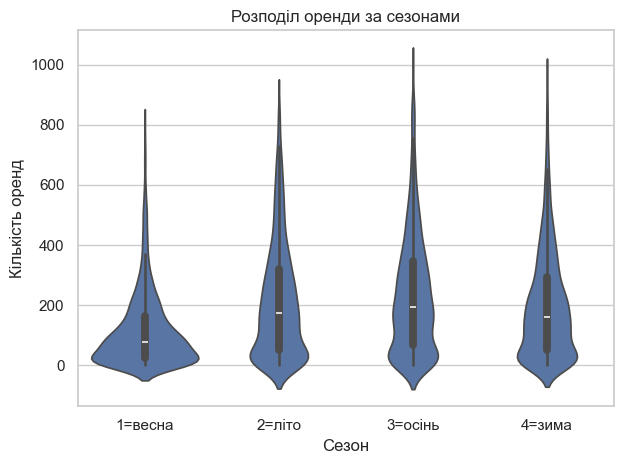

In [21]:
sns.violinplot(data=df, x='season', y='count')
plt.xticks(ticks=season_ticks, labels=season_labels)
plt.title('Розподіл оренди за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.tight_layout();

**Відповіді на питання:**
1. "Товщина" violin plot на певній висоті (кількості оренд) означає, наскільки часто зустрічаються такі значення: чим ширше - тим більше оренд з такими значеннями. Це фактично оцінка щільності розподілу (KDE), тільки у вертикальному вигляді.
2. Найбільша варіабельність оренди восени. Цей графік має найбільшу висоту. Розподіл охоплює великий діапазон оренд - від низьких до пікових значень.
3. Box plot показує тільки медіану, квартилі, викиди, а violin plot ще показує форму розподілу. Отже, Violin plot = box plot + KDE. Можна побачити не лише де центр, а й як поводяться дані навколо нього.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

In [7]:
plot_vars = df[['count', 'temp', 'humidity', 'windspeed']]

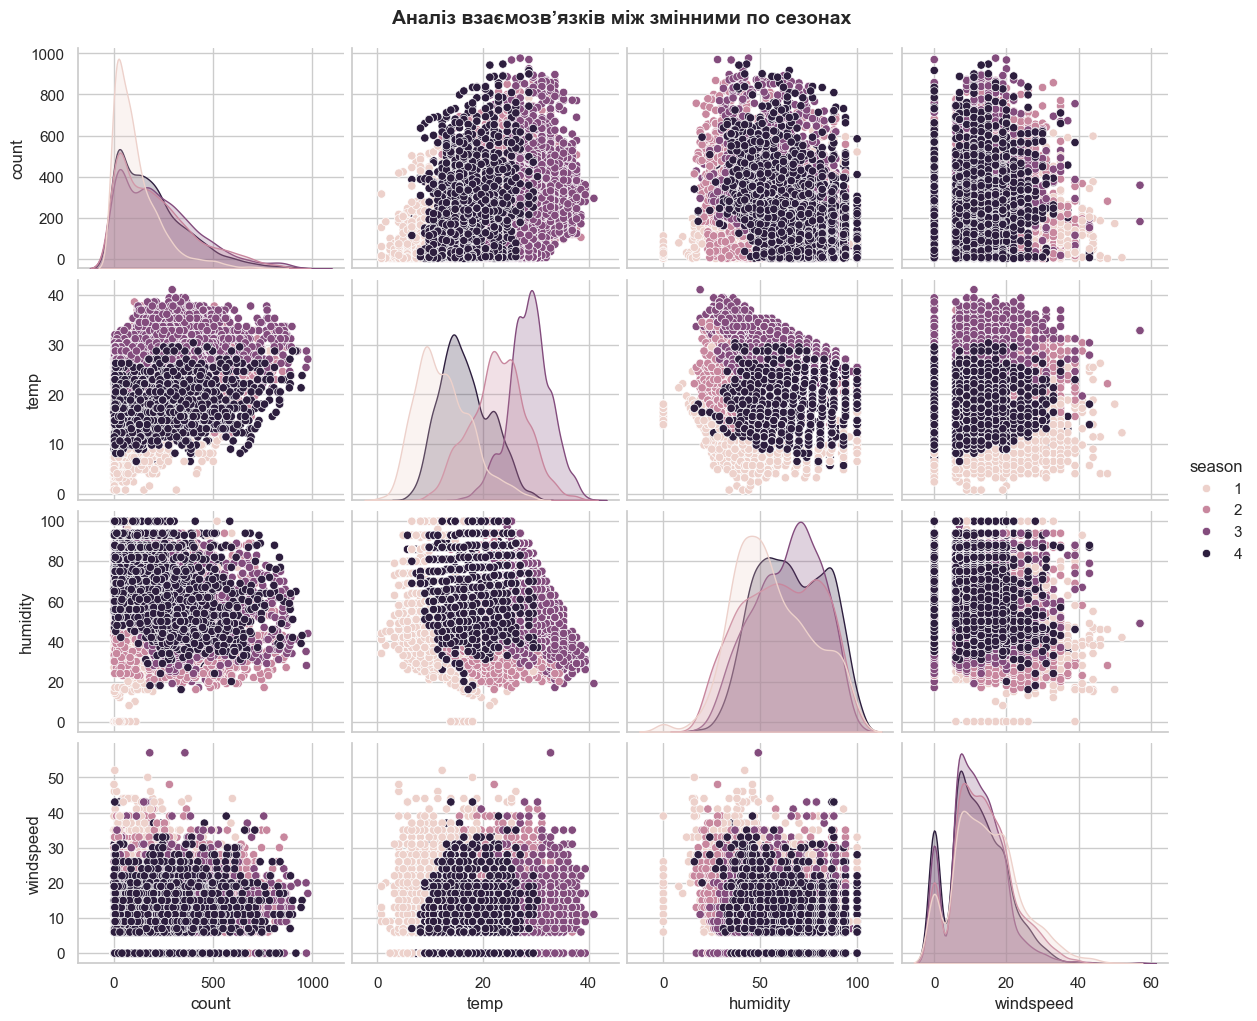

In [23]:
sns.pairplot(data=df, 
             vars=plot_vars, 
             hue='season', 
             height=2.5, 
             aspect=1.2)
plt.suptitle('Аналіз взаємозвʼязків між змінними по сезонах', fontsize=14, fontweight='bold', y=1.02);

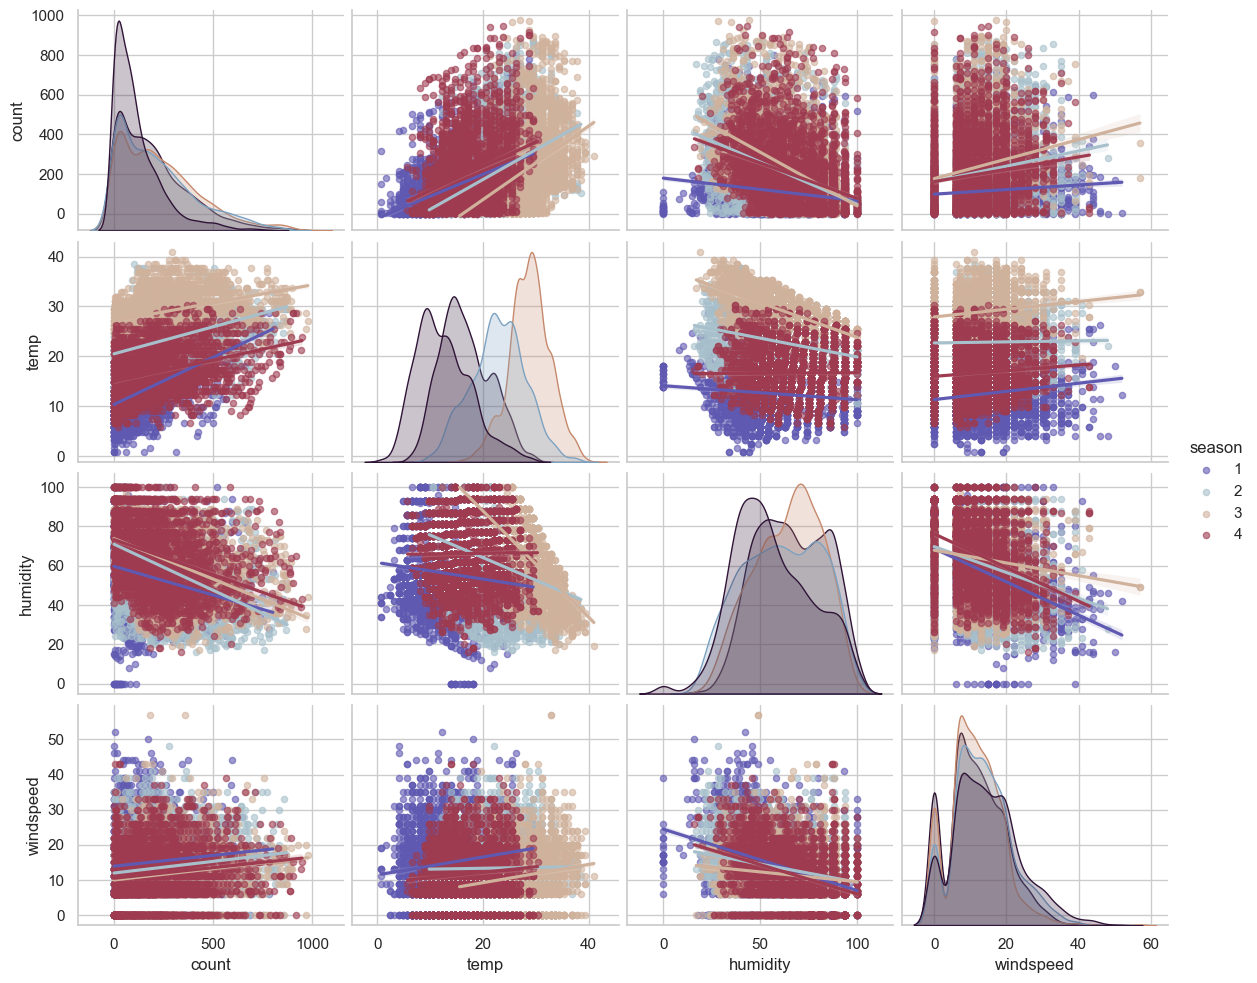

In [31]:
sns.pairplot(data=df, 
             vars=plot_vars, 
             hue='season',
             kind='reg',
             height=2.5, 
             aspect=1.2,
             palette='twilight_shifted',
             plot_kws={
                 'scatter_kws': {
                     's': 20,          #  розмір точок (менше = дрібніше)
                     'alpha': 0.6      #  прозорість точок
                 }
             }
            );

**Відповіді на питання:**
1. Найсильніший лінійний зв'язок спостерігається між темперутурою повітря в градусах цельсія (`temp`) та загальною кількістю оренди (`count`). Цей зв'язок є позитивним. В цьому можна переконатись додавши лінію регресії `kind='reg'`.
2. Найбільше змінюється від сезону температура (`temp`), вона має найсильніший сезонний розкид:
- Діагональні KDE-графіки (temp) демонструють чітко розділені піки для кожного сезону;
- Інші змінні (`humidity`, `windspeed`) мають часткове перекриття між сезонами.


## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

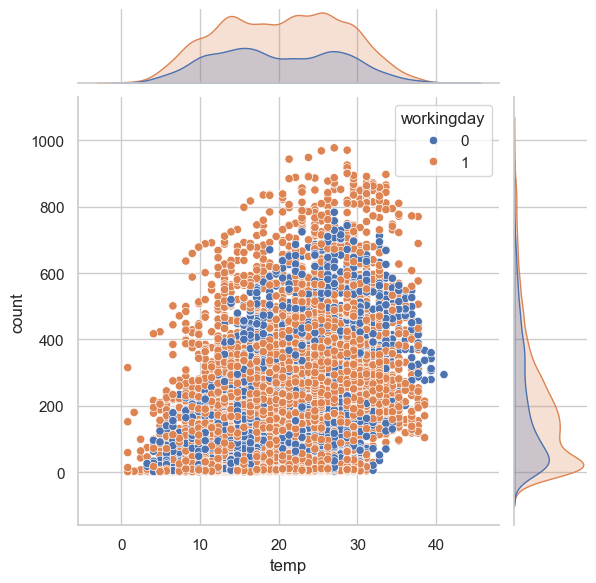

In [34]:
sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday'
);

**Відповіді на питання:**
1. Графіки по краях показують розподіли даних по кожній категорії (0 - неробочий день, 1 - робочий):
   - Горизонтальний графік (нагорі) - розподіл температури (`temp`);
   - Вертикальний графік (праворуч) - розподіл кількості оренд (`count`).

2. Поведінка користувачів у робочий і неробочий день відрізняється.
- В робочі дні кількість оренд більша при тій самій температурі.
- В неробочі дні кількість оренд набуває середніх значень (300-600) при великих температурах (30-40 градусів цельсія).